# 第2章 灰度变换
- 灰度变换（gray level transformation，或intensity transformation）是图像增强的基本方法，它利用指定的灰度变换函数，将输入图像f(x,y)每个像素的灰度值映射到输出图像g(x,y)中对应位置。
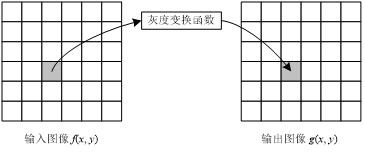

- 灰度变换（gray level transformation，或intensity transformation）是图像增强的基本方法，它利用指定的灰度变换函数，将输入图像f(x,y)每个像素的灰度值映射到输出图像g(x,y)对应位置，如图图2.1所示。
- 另一种常用的图像增强方法称为图像滤波，包括空域滤波和频域滤波，其中空域滤波是一种基于像素邻域的计算方法，将在第3章中介绍。频域滤波是一种变换域滤波技术，将在第4章中介绍。有关图像复原的内容将在第7章中讲解。
- 本章主要以灰度图像为例介绍灰度变换的常用方法，彩色图像的灰度变换将在“第5章 彩色图像处理”中介绍。

In [ ]:
#导入本章示例用到的包,使用本文档中示例前,先运行一次本段代码
#-*- coding: utf-8 -*-
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['STSong'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from skimage import io,exposure,color,util
%matplotlib inline

## 2.1 图像的亮度、对比度和动态范围

### 2.1.1 亮度

- 图像的亮度（Brightness），通常指图像的整体亮度。
- 像素的明暗取决于其灰度值或颜色分量的大小，图像的整体亮度则取决于所有像素的平均值。
- 曝光过度的图像显得亮而生硬，曝光不足的图像则暗而模糊。
- 简单地将图像每个像素的灰度值加上一个常数，就可以改变图像的整体亮度。

In [ ]:
#改变图像亮度
#读入一幅灰度图像
img = cv.imread('./imagedata/old_villa.jpg',cv.IMREAD_GRAYSCALE)

#采用OpenCV函数
imgbu1 = cv.add(img,100)
imgbd1 = cv.subtract(img,75)

#采用NumPy数组运算
imgbu2 = img.astype(float)+100
imgbu2 = np.clip(imgbu2,0,255).astype(np.uint8)
imgbd2 = img.astype(float)-75
imgbd2 = np.clip(imgbd2,0,255).astype(np.uint8)

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

plt.subplot(2,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('old_villa,Original') 
plt.axis('off')
plt.subplot(2,3,2); plt.imshow(imgbu1,vmin=0,vmax=255)
plt.title('Brightening by adding 100, OpenCV')
plt.axis('off')
plt.subplot(2,3,3); plt.imshow(imgbd1,vmin=0,vmax=255) 
plt.title('Darkening by subtracting 75, OpenCV')
plt.axis('off')

plt.subplot(2,3,5); plt.imshow(imgbu2,vmin=0,vmax=255)
plt.title('Brightening by adding 100, NumPy')
plt.axis('off')
plt.subplot(2,3,6); plt.imshow(imgbd2,vmin=0,vmax=255) 
plt.title('Darkening by subtracting 75, NumPy')
plt.axis('off')

plt.show()

In [ ]:
# Numpy ndarry.astype函数
# 复制数组并强制转换为指定的类型
a = np.array([50,100,200])
b = a.astype(float)
c = b + 100
d = np.clip(c,0,255)
e = d.astype(np.uint8)
print(a,b,c,d,e)

### 2.1.2 对比度

- 比度用于描述图像中不同区域、物体之间的可区分性。
- 对比度的高低取决于图像中明、暗区域之间的差别，即亮度的反差大小。反差越大意味着对比度越大，反差越小则对比度越小。
- 图像的对比度过高，给人的感觉就刺眼、醒目；图像的对比度过低，则给人感觉变化不明显，图像显得沉闷、晦暗，带来一种模糊的感觉。
- 图像对比度过高或过低，都会导致图像丢失灰度层次和信息，不利于图像细节的表现。
- 将图像所有像素的灰度值乘以常数a，就可以简单地拉大或缩小像素灰度值之间的差距，从而改变图像的对比度。

In [ ]:
#改变图像对比度
#读入一幅灰度图像
img = cv.imread('./imagedata/old_villa.jpg', 0)

#采用OpenCV函数
imgcu = cv.multiply(img,1.5)
imgcd = cv.multiply(img,0.5)

#采用NumPy数组运算
#imgcu = img.astype(np.float) * 1.5
#imgcu = np.clip(imgcu,0,255).astype(np.uint8)
#imgcd = img.astype(np.float) * 0.5
#imgcd = np.clip(imgcd,0,255).astype(np.uint8)

#显示结果
plt.figure(figsize=(16,5))
plt.gray()
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('old_villa,Original') 
plt.axis('off')
plt.subplot(1,3,2); plt.imshow(imgcu,vmin=0,vmax=255)
plt.title('Contrast enhancing by multiplying 1.5')
plt.axis('off')
plt.subplot(1,3,3); plt.imshow(imgcd,vmin=0,vmax=255) 
plt.title('Contrast weakening by multiplying 0.5')
plt.axis('off')

plt.show()

### 2.1.3 动态范围
- 一幅图像像素灰度值所跨越的值域，称为该图像灰度值的动态范围，像素的明暗变化被限制在这个范围内。
- 动态范围越大，变化层次越多，细节的表达能力也就越强。
- 改变图像的动态范围，同时会影响图像的对比度和亮度。
- 对于8位256级灰度图像而言，图像像素灰度值最大的动态范围为[0,255]。
- 统计图像中各灰度值对应的像素数量，得到该图像中各灰度值的分布规律，然后以直方图的形式显示，可用于考查一幅图像灰度值的动态范围。

In [ ]:
#定义计算绘制直方图函数,使用Matplotlib函数
def plot_grayHist(img,rows,cols,idx):
    plt.subplot(rows,cols,idx)
    histogram, bins, patch = plt.hist(img.ravel(), 256, histtype='bar',density=1)
    plt.xlabel('灰度级',fontsize=15)
    plt.ylabel('像素相对频数',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axis([0, 255, 0, np.max(histogram)])

In [ ]:
#通过灰度直方图揭示灰度动态范围，及其对图像视觉效果的影响
#读入灰度图像
img_dark = io.imread('./imagedata/pollen_dark.png')
img_bright = io.imread('./imagedata/pollen_bright.png')
img_dusky = io.imread('./imagedata/pollen_dusky.png')
img_perfect = io.imread('./imagedata/pollen_perfect.png')

#显示结果
plt.figure(figsize=(25,8))
plt.gray()
#图像
plt.subplot(2,4,1); plt.imshow(img_dark,vmin=0,vmax=255)
plt.title('pollen_image_dark') 
plt.axis('off')
plt.subplot(2,4,2); plt.imshow(img_bright,vmin=0,vmax=255)
plt.title('pollen_image_bright') 
plt.axis('off')
plt.subplot(2,4,3); plt.imshow(img_dusky,vmin=0,vmax=255)
plt.title('pollen_image_dusky') 
plt.axis('off')
plt.subplot(2,4,4); plt.imshow(img_perfect,vmin=0,vmax=255)
plt.title('pollen_image_perfect') 
plt.axis('off')

#绘制灰度直方图
plot_grayHist(img_dark,2,4,5)
plot_grayHist(img_bright,2,4,6)
plot_grayHist(img_dusky,2,4,7)
plot_grayHist(img_perfect,2,4,8)

plt.show()

## 2.2 线性灰度变换
### 2.2.1 带饱和处理的线性灰度变换函数

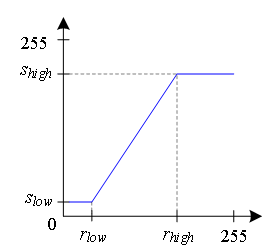

In [ ]:
#带饱和处理的线性灰度变换
#调用Scikit-image中exposure的函数rescale_intensity

#读入一幅灰度图像
img = io.imread('./imagedata/moon.png')

#对比度拉伸Contrast stretching，动态范围扩展
#采用函数默认方法，即rlow=输入图像灰度最小值、rhigh=输入图像灰度最大值
img_rescale1 = exposure.rescale_intensity(img)

#采用百分位数（percentile）选择rlow和rhigh
rlow_p2, rhigh_p98 = np.percentile(img, (2, 98))
img_rescale2 = exposure.rescale_intensity(img, in_range=(rlow_p2, rhigh_p98))

#显示结果
plt.figure(figsize=(15,8))
plt.gray()
plt.subplot(2,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Moon,Original') 
plt.axis('off')
plt.subplot(2,3,2); plt.imshow(img_rescale1,vmin=0,vmax=255)
plt.title('Contrast stretching by min/max')
plt.axis('off')
plt.subplot(2,3,3); plt.imshow(img_rescale2,vmin=0,vmax=255) 
plt.title('Contrast stretching by percentile ')
plt.axis('off')

#绘制灰度直方图
plot_grayHist(img,2,3,4)
plot_grayHist(img_rescale1,2,3,5)
plot_grayHist(img_rescale2,2,3,6)

plt.tight_layout()
plt.show()

### 2.2.2 分段线性灰度变换函数

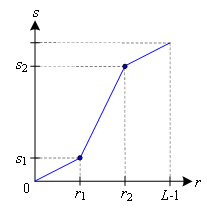

In [ ]:
#自定义分段线性灰度变换函数
def pwline_rescale_intensity(image,r1,s1,r2,s2):
    """
    输入参数: image   - 图像数组，灰度图像，数据类型uint8;
              r1, s1 - 控制点1对应的输入、输出灰度值, 在0-255之间取值;
              r2, s2 - 控制点2对应的输入、输出灰度值, 在0-255之间取值;
                       要求r1 < r2且s1 < s2
    返回参数：img_out - 灰度变换结果，数组，数据类型uint8;
                 lut - 灰度变换查找表,1*256一维数组;
    """
    #检测输入控制点参数是否有效
    if np.logical_or(r1>=r2,s1>=s2):
        print('the control point is invalid')
        exit()
    
    #创建查找表    
    lut = np.zeros(256, np.uint8)    
    for i in range(256):
        if i < r1:
            lut[i] = i*(s1/r1)
        elif i <= r2:
            lut[i] = (i-r1)*(s2 - s1)/(r2 - r1) + s1
        else:
            lut[i] = (i-r2)*(255.0 - s2)/(255.0 - r2) + s2    
    #对变换值进行饱和处理
    lut = np.clip(lut, 0, 255).astype(np.uint8)
    
    #查表进行灰度变换，Python索引技巧
    img_out = lut[image] 
    #返回结果
    return img_out,lut

### 使用分段线性灰度变换函数pwline_rescale_intensity()进行对比度拉伸，扩展图像的动态范围

In [ ]:
#对比度拉伸 Contrast stretching，动态范围扩展
#使用自定义分段线性灰度变换函数pwline_rescale_intensity()

#读入一幅灰度图像
img = io.imread('./imagedata/moon.png')

#根据输入图像直方图，确定控制点(r1,s1),(r2,s2)
#尝试改变控制点，看看新的变换效果
r1=80; s1=10
r2 =150; s2=220
#调用自定义分段线性灰度变换函数
img_pw,lut = pwline_rescale_intensity(img,r1,s1,r2,s2)

#显示结果
plt.figure(figsize=(16,5))
plt.gray()

#原图像
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Moon,Original') 
plt.axis('off')

#对比度拉伸后的图像
plt.subplot(1,3,2); plt.imshow(img_pw,vmin=0,vmax=255)
plt.title('Contrast stretching by piecewise linear')
plt.axis('off')

#绘制灰度变换函数曲线
plt.subplot(1,3,3); plt.plot(lut,color='red')
#plt.title('Piecewise linear intensity transformation') 
plt.xlabel('输入灰度值',fontsize=16)
plt.ylabel('输出灰度值',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axis([0, 255, 0, 255])

plt.show()

### 使用分段线性灰度变换函数pwline_rescale_intensity()拉伸花粉pollen图像的对比度拉伸（动态范围扩展）

In [ ]:
#对比度拉伸，使用自定义分段线性灰度变换函数pwline_rescale_intensity

#读入一幅灰度图像
img1 = io.imread('./imagedata/pollen_dark.png')
img2 = io.imread('./imagedata/pollen_bright.png')
img3 = io.imread('./imagedata/pollen_dusky.png')

#对比度拉伸 Contrast stretching

#pollen_dark
#确定控制点(r1,s1),(r2,s2)
r1 = np.min(img1); s1 =0
r2 = np.max(img1); s2 =255
img_pw1,lut1 = pwline_rescale_intensity(img1,r1,s1,r2,s2)

#pollen_bright
#确定控制点(r1,s1),(r2,s2)
r1 = np.min(img2); s1 =0
r2 = np.max(img2); s2 =255
img_pw2,lut2 = pwline_rescale_intensity(img2,r1,s1,r2,s2)

#pollen_dusky
#确定控制点(r1,s1),(r2,s2)
r1 = np.min(img3); s1 =0
r2 = np.max(img3); s2 =255
img_pw3,lut3 = pwline_rescale_intensity(img3,r1,s1,r2,s2)

#显示结果
plt.figure(figsize=(20,15))
plt.gray()

#原图像pollen_dark
plt.subplot(3,4,1), plt.imshow(img1,vmin=0,vmax=255)  
plt.title('pollen_dark,Original') 
plt.axis('off')
#对比度拉伸后的图像
plt.subplot(3,4,2), plt.imshow(img_pw1,vmin=0,vmax=255)
plt.title('Contrast stretching by piecewise linear')
plt.axis('off')
#绘制灰度变换函数曲线
plt.subplot(3,4,3), plt.plot(lut1,color='red')
plt.title('Piecewise linear intensity transformation') 
plt.xlabel('input intensity')
plt.ylabel('Output intensity')
plt.axis([0, 255, 0, 255])
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#绘制灰度直方图
plot_grayHist(img_pw1,3,4,4)

#原图像pollen_bright
plt.subplot(3,4,5), plt.imshow(img2,vmin=0,vmax=255)  
plt.title('pollen_bright,Original') 
plt.axis('off')
#对比度拉伸后的图像
plt.subplot(3,4,6), plt.imshow(img_pw2,vmin=0,vmax=255)
plt.title('Contrast stretching by piecewise linear')
plt.axis('off')
#绘制灰度变换函数曲线
plt.subplot(3,4,7), plt.plot(lut2,color='red')
plt.title('Piecewise linear intensity transformation') 
plt.xlabel('input intensity')
plt.ylabel('Output intensity')
plt.axis([0, 255, 0, 255])
#绘制灰度直方图
plot_grayHist(img_pw2,3,4,8)

#原图像pollen_dusky
plt.subplot(3,4,9), plt.imshow(img3,vmin=0,vmax=255)  
plt.title('pollen_dusky,Original') 
plt.axis('off')
#对比度拉伸后的图像
plt.subplot(3,4,10), plt.imshow(img_pw3,vmin=0,vmax=255)
plt.title('Contrast stretching by piecewise linear')
plt.axis('off')
#绘制灰度变换函数曲线
plt.subplot(3,4,11), plt.plot(lut3,color='red')
plt.title('Piecewise linear intensity transformation') 
plt.xlabel('input intensity')
plt.ylabel('Output intensity')
plt.axis([0, 255, 0, 255])
#绘制灰度直方图
plot_grayHist(img_pw3,3,4,12)

plt.show()

### 2.2.3 连续单独或同时调整图像的亮度和对比度

In [ ]:
#定义连续单独或同时调整图像的亮度和对比度灰度变换函数
def adjust_bright_contrast(image,b,c):
    """
    输入参数: image - 图像数组，灰度图像，数据类型uint8;
                 b - 在区间[-1, 1]内取值.b<0,降低亮度;b>0,提高亮度;
                 c - 在区间[-1, 1]内取值.c<0,降低对比度;c>0,提高对比度;
    返回参数：img_out - 灰度变换结果，数组，数据类型uint8;
    """
    
    k = np.tan((45+ 44*c)*np.pi/180)     
    
    #初始化查表法
    lookUpTable = np.zeros((1,256), np.uint8)
    for i in range(256):
        s = (i-127.5*(1 - b))*k + 127.5*(1+b)
        lookUpTable[0,i] = np.clip(s, 0, 255)
    
    #OpenCV查表函数进行灰度变换
    img_out = cv.LUT(image, lookUpTable)  
    #返回结果
    return img_out

In [ ]:
#使用adjust_bright_contrast()连续单独或同时调整图像的亮度和对比度灰度
#读入一幅灰度图像
img_bright = io.imread('./imagedata/pollen_bright.png')


# 调用自编函数调整图像的亮度和对比度
img_result = adjust_bright_contrast(img_bright,-0.35,0.4)

#显示结果
plt.figure(figsize=(10,5))
plt.gray()
#原图像
plt.subplot(1,2,1); plt.imshow(img_bright,vmin=0,vmax=255)
plt.title('pollen_bright,Original') 
plt.axis('off')
#亮度和对比度调整后的图像
plt.subplot(1,2,2); plt.imshow(img_result,vmin=0,vmax=255)
plt.title('Adjusts bright and contrast')
plt.axis('off')

plt.show()

## 2.3 非线性灰度变换

### 2.3.1 伽马校正Gamma Correction

- 术语伽马值(Gamma)来源于模拟摄影技术，后应用于电视技术，用来描述电视接收机所用阴极射线管显示器（CRT）的非线性特征。CRT显示器的亮度与输入信号电压之间的关系，可表示为一个指数Gamma在1.8-2.8范围内变化的幂函数，具体设备的值由制造厂家基于实际测量给定。CRT显示器的这种非线性输入输出响应，导致显示的图像亮度失真。如果在显示之前，先对输入图像用一个指数为设备Gamma值的倒数（即1/Gamma）的伽马变换进行预处理，修正设备的非线性，就能得到接近原图像亮度的输出，这一过程被称为伽马校正。

- 当0<Gamma<1时，输入灰度r低值端较暗区域范围内曲线的斜率大于1，动态范围得到扩展；而中、高值端较亮区域范围内曲线的斜率小于1，相应动态范围被压缩。相反，当 Gamma>1时，输入灰度值r低值端较暗区域动态范围被压缩，亮区域的动态范围被扩展。输入灰度值r被扩展和压缩的区域及程度取决于Gamma大小。

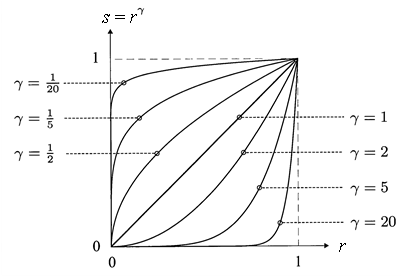

In [ ]:
#航拍图像的伽马校正

#读入一幅灰度图像
img = cv.imread('./imagedata/washed_out_aerial_image.jpg', 0)

gamma = 3
#采用查表法

lookUpTable = np.zeros(256, dtype=np.uint8)
for i in range(256):
    s = np.power(i/255.0, gamma)*255.0
    lookUpTable[i] = np.clip(s, 0, 255)

#查表进行灰度变换
img_gc = lookUpTable[img]

#或调用exposure模块中的函数进行伽马校正
#img_gc = exposure.adjust_gamma(img,gamma)

#显示结果
plt.figure(figsize=(12,5))
plt.gray()

plt.subplot(1,2,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('ashed_out_aerial_image,Original') 
plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_gc,vmin=0,vmax=255)
plt.title('Gamma corrected, Gamma=3')
plt.axis('off')

plt.show()

### 2.3.2 对数校正

- 从下图给出的对数校正log曲线的形状可以看出，对数校正能扩展低端暗区域像素灰度值的动态范围、压缩高端亮区域像素灰度值的动态范围。
- 因此，对数校正常用于压缩动态范围过大而不能正常显示的图像，或增强暗背景中仅有若干亮点的图像。

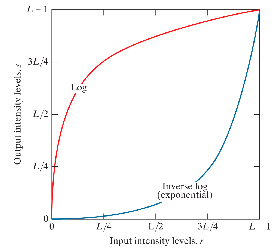

In [ ]:
#采用对数校正压缩图像的动态范围
#对数校正logarithmic correction

#读入一幅灰度图像
#img = cv.imread('.\imagedata\lena.png',cv.IMREAD_GRAYSCALE)

img = io.imread('./imagedata/lena_gray.bmp')
#计算图像的傅里叶频谱
imgdft = np.fft.fft2(img)
#频谱中心化处理
imgdft_cent = np.fft.fftshift(imgdft)

#取绝对值,计算图像傅里叶变换幅度谱
imgdftmag_cent = np.abs(imgdft_cent)

#对中心化幅度谱进行对数校正，将数据映射到[0,255]
#获取输入图像最大灰度值,计算比例因子c
c = 255/np.log10(1+ np.max(imgdftmag_cent));
imgdftmaglog_cent = c * np.log10(imgdftmag_cent + 1)
#对结果进行饱和处理，并将数据类型转换为uint8
imgdftmaglog_cent= np.clip(imgdftmaglog_cent,0,255).astype(np.uint8)

#或调用scikit-image函数实现对数校正
#imgdftmaglog_cent = exposure.adjust_log(imgdftmag_cent, gain=1)

#显示结果
plt.figure(figsize=(15,5))
plt.gray()

plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('lena') 
plt.axis('off')
plt.subplot(1,3,2); plt.imshow(imgdftmag_cent)
plt.title('lena DFT')
plt.axis('off')
plt.subplot(1,3,3); plt.imshow(imgdftmaglog_cent)
plt.title('lena DFT logarithmic correction')
plt.axis('off')

plt.show()

In [ ]:
exposure.adjust_log(img, 1)

### 2.3.3 指数校正

- 指数校正能增强图像中亮区域的细节（对比度提高），同时弱化图像中暗区域的细节（对比度降低）。

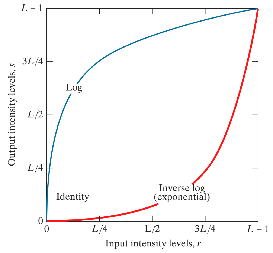

In [ ]:
#指数校正exponential correction

#读入一幅灰度图像
img = io.imread('./imagedata/padnew.jpg')

k = 1.01
#获取输入图像最大灰度值,计算比例因子c
c = 255.0/(np.power(k, np.max(img))-1)

#采用查表法
lookUpTable = np.zeros((1,256), np.uint8)
for i in range(256):
    s = c*(np.power(k, i)-1)
    lookUpTable[0,i] = np.clip(s, 0, 255)

#查表进行灰度变换
img_ec = cv.LUT(img, lookUpTable)

#显示结果
plt.figure(figsize=(15,5))
plt.gray()
plt.subplot(1,2,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('pad') 
plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_ec,vmin=0,vmax=255)
plt.title('pad image, exponential correction')
plt.axis('off')

plt.show()

## 2.4 图像直方图

- 图像直方图（Image Histogram）是统计图像灰度值分布规律的工具，又称灰度直方图（Intensity Histogram）。
- 如果将图像中像素灰度值看成是一个随机变量，则其取值分布就反映了图像的统计特性，这一特性可用灰度直方图(Intensity histogram)来描述。
- 灰度直方图反映了图像中各灰度值出现的频数。
- 考察一幅图像直方图，根据灰度值分布的范围和均匀程度，就可以判断出该图像曝光是否合适。所以，数码相机常在取景器上实时显示图像直方图，为用户提供图像曝光状态，避免曝光不佳。


### 2.4.4 灰度直方图的计算

In [ ]:
#图像直方图计算与显示

#读入一幅灰度图像
img = io.imread('./imagedata/cameraman.tif')

#OpenCV计算灰度直方图
hist_cv = cv.calcHist([img],[0],None,[256],[0,256])

#NumPy计算灰度直方图与累积直方图
hist_np,bin_edges = np.histogram(img,256,range=(0.0,255.0))
cdf_np = np.cumsum(hist_np/img.size)

#Scikit-image计算直方图与累积直方图
hist_sk,bin_centers = exposure.histogram(img,nbins=256,source_range='dtype', normalize=False)
cdf_sk,bin_centers = exposure.cumulative_distribution(img, nbins=256)

#显示结果
plt.figure(figsize=(18,22))
plt.gray()

#显示灰度图像
plt.subplot(4,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Cameraman,Original') 
plt.axis('off')

#OpenCV
plt.subplot(4,3,2); plt.plot(hist_cv,color='green')
plt.title('Image intensity histogram-OpenCV') 
plt.xlabel('gray level')
plt.ylabel('Number of pixels')
plt.axis([0, 255, 0, np.max(hist_cv)])

#NumPy
plt.subplot(4,3,4); plt.bar(range(256),hist_np,width = 1,color='blue')
plt.title('Image intensity histogram-NumPy') 
plt.xlabel('gray level')
plt.ylabel('Number of pixels')
plt.axis([0, 255, 0, np.max(hist_np)])

plt.subplot(4,3,5); plt.bar(range(256),hist_np/img.size,width = 1,color='blue')
plt.title('Normalized histogram-NumPy') 
plt.xlabel('gray level')
plt.ylabel('pdf')
plt.axis([0, 255, 0, np.max(hist_np/img.size)])

plt.subplot(4,3,6); plt.bar(range(256),cdf_np,width = 1,color='blue')
plt.title('Cumulative histogram-NumPy') 
plt.xlabel('gray level')
plt.ylabel('cdf')
plt.axis([0, 255, 0, 1])

#Scikit-image
plt.subplot(4,3,7); plt.bar(range(256),hist_sk,width = 1,color='red')
plt.title('Image intensity histogram-Scikit-image') 
plt.xlabel('gray level')
plt.ylabel('Number of pixels')
plt.axis([0, 255, 0, np.max(hist_sk)])

plt.subplot(4,3,8); plt.bar(range(256),hist_sk/img.size,width = 1,color='red')
plt.title('Normalized histogram-Scikit-image') 
plt.xlabel('gray level')
plt.ylabel('pdf')
plt.axis([0, 255, 0, np.max(hist_sk/img.size)])

plt.subplot(4,3,9); plt.bar(range(cdf_sk.shape[0]),cdf_sk,width = 1,color='red')
plt.title('Cumulative histogram-Scikit-image') 
plt.xlabel('gray level')
plt.ylabel('cdf')
plt.axis([0, 255, 0, 1])

#Matplotlib
plt.subplot(4,3,10); plt.hist(img.ravel(), bins=256)
plt.title('Image intensity histogram-Matplotlib') 
plt.xlabel('gray level')
plt.ylabel('Number of pixels')

plt.subplot(4,3,11); plt.hist(img.ravel(), bins=256, density=1)
plt.title('Normalized histogram-Matplotlib') 
plt.xlabel('gray level')
plt.ylabel('pdf')

plt.subplot(4,3,12); plt.hist(img.ravel(), bins=256, density=True,cumulative=True)
plt.title('Cumulative histogram-Matplotlib') 
plt.xlabel('gray level')
plt.ylabel('cdf')

plt.show() 

### 彩色图像各颜色分量的直方图-叠加显示

In [ ]:
#Matplotlib计算彩色图像RGB颜色分量直方图并叠加显示

#读入一幅彩色图像
imgc = io.imread('./imagedata/chelsea.png')

#显示图像
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(imgc)
plt.title('Cat chelsea,Original') 
plt.axis('off')

#计算彩色图像RGB颜色分量的直方图，并以叠加方式显示
plt.subplot(1,2,2)
plt.hist(imgc[:,:,0].ravel(), bins=256, color='r')
plt.hist(imgc[:,:,1].ravel(), bins=256, color='g')
plt.hist(imgc[:,:,2].ravel(), bins=256, color='b')
#plt.title('Image color channel intensity histogram') 
plt.xlabel('灰度级',fontsize=18)
plt.ylabel('像素频数',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

## 采用OpenCV的彩色图像直方图

In [ ]:
"""
Color histograms
"""

def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_rgb(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 3, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color):
        plt.plot(h, color=c)


def hist_color_img(img):
    """Calculates the histogram for a three-channel image"""

    histr = []
    histr.append(cv.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv.calcHist([img], [2], None, [256], [0, 256]))
    return histr


# Create the dimensions of the figure and set title:
plt.figure(figsize=(15, 6))
plt.suptitle("Color histograms", fontsize=14, fontweight='bold')

# Load the original image:
image = cv.imread('./imagedata/chelsea.png')

# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)

# Show the BGR image:
show_img_with_matplotlib(image, "image", 1)

# Show the created histogram:
show_hist_with_matplotlib_rgb(hist_color, "color histogram", 4, ['b', 'g', 'r'])

# Add 15 to every pixel on the grayscale image (the result will look lighter) and calculate histogram:
M = np.ones(image.shape, dtype="uint8") * 25
added_image = cv.add(image,M)
#added_image =np.clip(image+[25,25,25],0,255).astype(np.uint8)
hist_color_added_image = hist_color_img(added_image)

# Subtract 15 from every pixel (the result will look darker) and calculate histogram:
subtracted_image = cv.subtract(image, M)
hist_color_subtracted_image = hist_color_img(subtracted_image)

# Plot the images and the histograms:
show_img_with_matplotlib(added_image, "image lighter", 2)
show_hist_with_matplotlib_rgb(hist_color_added_image, "color histogram", 5, ['b', 'g', 'r'])
show_img_with_matplotlib(subtracted_image, "image darker", 3)
show_hist_with_matplotlib_rgb(hist_color_subtracted_image, "color histogram", 6, ['b', 'g', 'r'])

# Show the Figure:
plt.show()

## 2.5 直方图均衡化

- 由前几节分析可知，一个分布均匀、平坦的灰度直方图，往往对应着一幅视觉效果较理想的图像。
- 因此，直方图均衡化（Histogram equalization）的目的是找到一个灰度变换函数，使得处理后图像的灰度直方图近似为均匀分布。
- 可以证明，选择输入图像的累积直方图作为灰度变换函数，就可以得到一幅灰度直方图近似均匀分布的输出图像。

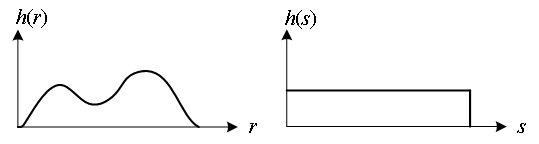

### 示例：花粉图像的直方图均衡化

In [ ]:
#花粉图像的直方图均衡化
#读入灰度图像
img_dark = io.imread('./imagedata/pollen_dark.png')
img_bright = io.imread('./imagedata/pollen_bright.png')
img_dusky = io.imread('./imagedata/pollen_dusky.png')
img_perfect = io.imread('./imagedata/pollen_perfect.png')

#OpenCV 全局直方图均衡化
imgequ_dark = cv.equalizeHist(img_dark)
imgequ_bright = cv.equalizeHist(img_bright)
imgequ_dusky = cv.equalizeHist(img_dusky)
imgequ_perfect = cv.equalizeHist(img_perfect)

#显示结果
plt.figure(figsize=(16,12))
plt.gray()

#原图像pollen_dark
plt.subplot(4,4,1); plt.imshow(img_dark,vmin=0,vmax=255)
plt.title('pollen_dark,原图像') 
plt.axis('off')
#原图像pollen_dark的灰度直方图
plt.subplot(4,4,2);plt.hist(img_dark.ravel(), bins=256, range=(0,255), density=1)
plt.title('pollen_dark的灰度直方图') 
#OpenCV全局直方图均衡化结果
plt.subplot(4,4,3); plt.imshow(imgequ_dark,vmin=0,vmax=255)
plt.title('全局直方图均衡化结果') 
plt.axis('off')
#OpenCV全局直方图均衡化图像的灰度直方图
plt.subplot(4,4,4); plt.hist(imgequ_dark.ravel(), bins=256,density=1)
plt.title('全局直方图均衡化图像的灰度直方图') 

#原图像pollen_bright
plt.subplot(4,4,5); plt.imshow(img_bright,vmin=0,vmax=255)
plt.title('pollen_bright,原图像') 
plt.axis('off')
#原图像pollen_bright的灰度直方图
plt.subplot(4,4,6);plt.hist(img_bright.ravel(), bins=256, range=(0,255), density=1)
plt.title('pollen_bright的灰度直方图') 
#OpenCV全局直方图均衡化结果
plt.subplot(4,4,7); plt.imshow(imgequ_bright,vmin=0,vmax=255)
plt.title('全局直方图均衡化结果 ') 
plt.axis('off')
#OpenCV全局直方图均衡化图像的灰度直方图
plt.subplot(4,4,8); plt.hist(imgequ_bright.ravel(), bins=256,density=1)
plt.title('全局直方图均衡化图像的灰度直方图') 

#原图像pollen_dusky
plt.subplot(4,4,9); plt.imshow(img_dusky,vmin=0,vmax=255)
plt.title('pollen_dusky,原图像') 
plt.axis('off')
#原图像pollen_dusky的灰度直方图
plt.subplot(4,4,10);plt.hist(img_dusky.ravel(), bins=256, range=(0,255), density=1)
plt.title('pollen_dusky的灰度直方图') 
#OpenCV全局直方图均衡化结果
plt.subplot(4,4,11); plt.imshow(imgequ_dusky,vmin=0,vmax=255)
plt.title('全局直方图均衡化结果 ') 
plt.axis('off')
#OpenCV全局直方图均衡化图像的灰度直方图
plt.subplot(4,4,12); plt.hist(imgequ_dusky.ravel(), bins=256,density=1)
plt.title('全局直方图均衡化图像的灰度直方图') 

#原图像pollen_perfect
plt.subplot(4,4,13); plt.imshow(img_perfect,vmin=0,vmax=255)
plt.title('pollen_perfect,原图像') 
plt.axis('off')
#原图像pollen_perfect的灰度直方图
plt.subplot(4,4,14);plt.hist(img_perfect.ravel(), bins=256, range=(0,255), density=1)
plt.title('pollen_perfect的灰度直方图') 
#OpenCV全局直方图均衡化结果
plt.subplot(4,4,15); plt.imshow(imgequ_perfect,vmin=0,vmax=255)
plt.title('全局直方图均衡化结果 ') 
plt.axis('off')
#OpenCV全局直方图均衡化图像的灰度直方图
plt.subplot(4,4,16); plt.hist(imgequ_perfect.ravel(), bins=256,density=1)
plt.title('全局直方图均衡化图像的灰度直方图') 

plt.show()

### 示例：灰度图像的全局直方图均衡化、对比度受限自适应直方图均衡化

In [ ]:
#灰度图像的直方图均衡化

#读入一幅灰度图像
img = io.imread('./imagedata/moon.png')

#OpenCV 全局直方图均衡化
imgequ1_cv = cv.equalizeHist(img)
#OpenCV对比度受限自适应直方图均衡化CLAHE
clahe = cv.createCLAHE(clipLimit=6.0,tileGridSize=(8,8))
imgequ2_cv = clahe.apply(img)

#Scikit-image全局直方图均衡化
imgequ1_sk = exposure.equalize_hist(img)
#将图像数据类型由浮点型转为uint8
imgequ1_sk = util.img_as_ubyte(imgequ1_sk)
#Scikit-image对比度受限自适应直方图均衡化CLAHE
imgequ2_sk = exposure.equalize_adapthist(img, clip_limit=0.03)
#将图像数据类型由浮点型转为uint8
imgequ2_sk = util.img_as_ubyte(imgequ2_sk)

#显示结果
plt.figure(figsize=(19,15))
plt.gray()

#原图像moon
plt.subplot(3,4,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('moon,Original') 
plt.axis('off')
#原图像moon的灰度直方图
plt.subplot(3,4,2);plt.hist(img.ravel(), bins=256,density=1)
plt.title('Image intensity histogram') 
#原图像moon的累积直方图
plt.subplot(3,4,3)
plt.hist(img.ravel(), bins=256, density=True,cumulative=True,histtype='step')
plt.title('Cumulative histogram,CDF') 

#OpenCV全局直方图均衡化结果
plt.subplot(3,4,5); plt.imshow(imgequ1_cv,vmin=0,vmax=255)
plt.title('Global Histogram Equalization_OpenCV ') 
plt.axis('off')
#OpenCV全局直方图均衡化图像的灰度直方图
plt.subplot(3,4,6); plt.hist(imgequ1_cv.ravel(), bins=256,density=1)
plt.title('GHE Image intensity histogram_OpenCV') 
#OpenCV CLAHE结果
plt.subplot(3,4,7); plt.imshow(imgequ2_cv,vmin=0,vmax=255)
plt.title('CLAHE_OpenCV ') 
plt.axis('off')
#OpenCV CLAHE图像的灰度直方图
plt.subplot(3,4,8); plt.hist(imgequ2_cv.ravel(), bins=256,density=1)
plt.title('CLAHE Image intensity histogram_OpenCV') 

#Scikit-image全局直方图均衡化结果
plt.subplot(3,4,9); plt.imshow(imgequ1_sk,vmin=0,vmax=255)
plt.title('Global Histogram Equalization_SK') 
plt.axis('off')
#Scikit-image全局直方图均衡化图像的灰度直方图
plt.subplot(3,4,10); plt.hist(imgequ1_sk.ravel(), bins=256,density=1)
plt.title('GHE Image intensity histogram_SK') 
#Scikit-image CLAHE结果
plt.subplot(3,4,11); plt.imshow(imgequ2_sk,vmin=0,vmax=255)
plt.title('CLAHE_SK') 
plt.axis('off')
#Scikit-image CLAHE图像的灰度直方图
plt.subplot(3,4,12); plt.hist(imgequ2_sk.ravel(), bins=256,density=1)
plt.title('CLAHE Image intensity histogram_SK') 

plt.show()

## 彩色图像的直方图均衡化

In [ ]:
#直接均衡化RGB颜色通道的结果-颜色失真
#读入一幅彩色图像
img = io.imread('./imagedata/lena.bmp')

#对RGB通道分量分别进行全局直方图均衡化
imgb_eq = cv.equalizeHist(img[:,:,0])
imgg_eq = cv.equalizeHist(img[:,:,1])
imgr_eq = cv.equalizeHist(img[:,:,2])

imgeq1 = np.dstack([imgb_eq,imgg_eq,imgr_eq])

#Scikit-image对亮度分量全局直方图均衡化
img_hsv = color.rgb2hsv(img)
img_hsv[:,:,2] = exposure.equalize_hist(img_hsv[:,:,2])
imgeq2 = color.hsv2rgb(img_hsv)
imgeq2 = util.img_as_ubyte(imgeq2)

#Scikit-mage进行全局直方图均衡化GHE,视RGB分量为整体数据集
imgeq3 = exposure.equalize_hist(img)
#数据类型转换为uint8
imgeq3 = util.img_as_ubyte(imgeq3)

#显示结果
plt.figure(figsize=(15,6))
#原彩色图像
plt.subplot(1,4,1); plt.imshow(img)
plt.title('Lena,Original') 
plt.axis('off')
#OpenCV全局直方图均衡化结果
plt.subplot(1,4,2); plt.imshow(imgeq1)
plt.title('GHE_RGB分量_OenCV') 
plt.axis('off')

#Scikit-image对亮度分量全局直方图均衡化结果
plt.subplot(1,4,3); plt.imshow(imgeq2)
plt.title('GHE_V_Scikit-image') 
plt.axis('off')
#Scikit-image视RGB分量为整体数据集全局直方图均衡化结果
plt.subplot(1,4,4); plt.imshow(imgeq3)
plt.title('GHE_RGB整体_Scikit-image') 
plt.axis('off')

plt.show()

## OpenCV 彩色图像的直方图均衡化，通过对亮度V分量进行全局直方图均衡化来实现

In [ ]:
#OpenCV彩色图像的直方图均衡化

#读入一幅彩色图像
img = cv.imread('./imagedata/temple.jpg')

#将图像颜色空间转换为HSV
imghsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
imghsv_old = imghsv.copy()

#对V通道分量进行全局直方图均衡化
imgv_eq1 = cv.equalizeHist(imghsv[:,:,2])

#对V通道分量采用CLAHE直方图均衡化
clahe = cv.createCLAHE(clipLimit= 2.0,tileGridSize=(8,8))
imgv_eq2 = clahe.apply(imghsv[:,:,2])

imghsv[:,:,2] = imgv_eq1  
#将颜色空间转换为BGR
imgeq1 = cv.cvtColor(imghsv, cv.COLOR_HSV2BGR)
imghsv[:,:,2] = imgv_eq2  
#将颜色空间转换为BGR
imgeq2 = cv.cvtColor(imghsv, cv.COLOR_HSV2BGR)

#显示结果
plt.figure(figsize=(18,16))
#原彩色图像
plt.subplot(3,3,1); plt.imshow(img[:,:,::-1])
plt.title('temple,Original') 
plt.axis('off')
#全局直方图均衡化结果
plt.subplot(3,3,2); plt.imshow(imgeq1[:,:,::-1])
plt.title('GHE-Global Histogram Equalization') 
plt.axis('off')

#全CLAHE直方图均衡化结果
plt.subplot(3,3,3); plt.imshow(imgeq2[:,:,::-1])
plt.title('CLAHE') 
plt.axis('off')

#计算彩色图像RGB颜色通道的直方图，并以叠加方式显示
#原图像
plt.subplot(3,3,4)
plt.hist(img[:,:,0].ravel(), bins=256,density=1, color='b')
plt.hist(img[:,:,1].ravel(), bins=256,density=1, color='g')
plt.hist(img[:,:,2].ravel(), bins=256,density=1, color='r')
plt.title('Original color histogram') 

#全局直方图均衡化GHE图像
plt.subplot(3,3,5)
plt.hist(imgeq1[:,:,0].ravel(), bins=256,density=1, color='b')
plt.hist(imgeq1[:,:,1].ravel(), bins=256,density=1, color='g')
plt.hist(imgeq1[:,:,2].ravel(), bins=256,density=1, color='r')
plt.title('GHE color histogram') 

#采用CLAHE直方图均衡化图像
plt.subplot(3,3,6)
plt.hist(imgeq2[:,:,0].ravel(), bins=256,density=1, color='b')
plt.hist(imgeq2[:,:,1].ravel(), bins=256,density=1, color='g')
plt.hist(imgeq2[:,:,2].ravel(), bins=256,density=1, color='r')
plt.title('CLAHE color histogram') 

#显示均衡化前后图像V通道的直方图
#原图像
plt.subplot(3,3,7)
plt.hist(imghsv_old[:,:,2].ravel(), bins=256,density=1, color='black')
plt.title('Original V histogram') 
#全局直方图均衡化GHE图像
plt.subplot(3,3,8)
plt.hist(imgv_eq1.ravel(), bins=256,density=1, color='black')
plt.title('GHE V histogram')
#CLAHE均衡化GHE图像
plt.subplot(3,3,9)
plt.hist(imgv_eq2.ravel(), bins=256,density=1, color='black')
plt.title('CLAHE V histogram')

plt.show()

## Scikit-image彩色图像的直方图均衡化，通过对亮度V分量进行全局直方图均衡化来实现

In [ ]:
#Scikit-image 彩色图像的直方图均衡化
#读入一幅彩色图像
img =io.imread('./imagedata/temple.jpg')

#将图像颜色空间转换为HSV
imghsv = color.rgb2hsv(img)
#对V通道分量进行全局直方图均衡化GHE
imgv_eq1 = exposure.equalize_hist(imghsv[:,:,2])

#对V通道分量采用CLAHE直方图均衡化
imgv_eq2 = exposure.equalize_adapthist(imghsv[:,:,2], kernel_size=None, clip_limit=0.01, nbins=256)
 
#将颜色空间转换为RGB
imghsv[:,:,2] = imgv_eq1 
imgeq1 = color.hsv2rgb(imghsv)
#数据类型转换为uint8
imgeq1 = util.img_as_ubyte(imgeq1)
 
#将颜色空间转换为RGB
imghsv[:,:,2] = imgv_eq2 
imgeq2 = color.hsv2rgb(imghsv)
#数据类型转换为uint8
imgeq2 = util.img_as_ubyte(imgeq2)

#显示结果
plt.figure(figsize=(18,8))
#原彩色图像
plt.subplot(2,3,1); plt.imshow(img)
plt.title('temple,Original') 
plt.axis('off')
#全局直方图均衡化GHE结果
plt.subplot(2,3,2); plt.imshow(imgeq1)
plt.title('GHE') 
plt.axis('off')
#全CLAHE直方图均衡化结果
plt.subplot(2,3,3); plt.imshow(imgeq2)
plt.title('CLAHE') 
plt.axis('off')

#计算彩色图像RGB颜色通道的直方图，并以叠加方式显示
#原图像
plt.subplot(2,3,4)
plt.hist(img[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(img[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(img[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('Original color histogram') 

#全局直方图均衡化图像
plt.subplot(2,3,5)
plt.hist(imgeq1[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(imgeq1[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(imgeq1[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('GHE color histogram') 

#采用CLAHE直方图均衡化图像
plt.subplot(2,3,6)
plt.hist(imgeq2[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(imgeq2[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(imgeq2[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('CLAHE color histogram') 

plt.show()

## Scikit-image彩色图像的直方图均衡化，统计RGB三个分量形成一灰度个直方图

In [ ]:
#Scikit-image 彩色图像的直方图均衡化
#读入一幅彩色图像
img =io.imread('./imagedata/temple.jpg')

#进行全局直方图均衡化GHE
imgeq1 = exposure.equalize_hist(img)
#数据类型转换为uint8
imgeq1 = util.img_as_ubyte(imgeq1)

#采用CLAHE直方图均衡化
imgeq2 = exposure.equalize_adapthist(img, kernel_size=16, clip_limit=0.015)
#数据类型转换为uint8
imgeq2 = util.img_as_ubyte(imgeq2)

#显示结果
plt.figure(figsize=(18,8))
#原彩色图像
plt.subplot(2,3,1); plt.imshow(img)
plt.title('temple,Original') 
plt.axis('off')
#全局直方图均衡化GHE结果
plt.subplot(2,3,2); plt.imshow(imgeq1)
plt.title('GHE') 
plt.axis('off')
#全CLAHE直方图均衡化结果
plt.subplot(2,3,3); plt.imshow(imgeq2)
plt.title('CLAHE') 
plt.axis('off')

#计算彩色图像RGB颜色通道的直方图，并以叠加方式显示
#原图像
plt.subplot(2,3,4)
plt.hist(img[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(img[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(img[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('Original color histogram') 

#全局直方图均衡化图像
plt.subplot(2,3,5)
plt.hist(imgeq1[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(imgeq1[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(imgeq1[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('GHE color histogram') 

#采用CLAHE直方图均衡化图像
plt.subplot(2,3,6)
plt.hist(imgeq2[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(imgeq2[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(imgeq2[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('CLAHE color histogram') 

plt.show()

## 2.6 直方图匹配
- 直方图均衡化能使处理后的图像灰度值具有近似均匀分布，得到了广泛应用。但是，直方图均衡化处理后图像的视觉效果，常常显得不自然。
- 视觉质量好的图像并不一定具有均匀分布，大多数实拍图像的灰度直方图，多呈现近似于单峰或多峰高斯分布。
- 直方图匹配，目的是寻找一个灰度变换函数，使得处理之后图像的直方图，与指定的灰度直方图相同（相匹配）。由于灰度直方图为离散量，这种匹配只是一种近似。
- 直方图匹配可以调整不同曝光、光照条件下所拍摄的图像，在打印或显示的时候使其能有相似的效果。



- ### Scikit-image 灰度图像直方图匹配 match_histograms
- img_matched = exposure.match_histograms(image, reference, multichannel=False)
- 输入参数：
    - image - 源图像数组，灰度图像或彩色图像
    - reference - 参考图像数组，应具有与image相同的颜色通道数。
    - multichannel - bool型变量,如果image为彩色图像，令multichannel=True。
- 返回值：
    - img_matched - 图像数组。

- 注意：该函数在处理灰度图像时，即multichannel=False，返回值img_matched的数据类型位float64，范围[0.0,255.0]，应转换为uint8

In [ ]:
#Scikit-image 灰度图像直方图匹配 match_histograms

#读入原图像
img = io.imread('./imagedata/cameraman.tif')
#读入参考图像
imgref = io.imread('./imagedata/moon.png') 

#进行直方图匹配
imgmatched = exposure.match_histograms(img,imgref,multichannel = False)
#将数据类型转换为uint8
imgmatched = np.uint8(imgmatched)

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#原灰度图像
plt.subplot(2,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('cameraman, 原图像',fontsize=18) 
plt.axis('off')
#参考图像
plt.subplot(2,3,2); plt.imshow(imgref,vmin=0,vmax=255)
plt.title('moon, 参考图像',fontsize=18) 
plt.axis('off')
#直方图匹配结果
plt.subplot(2,3,3); plt.imshow(imgmatched,vmin=0,vmax=255)
plt.title('直方图匹配结果',fontsize=18) 
plt.axis('off')

#显示图像灰度直方图
#原图像灰度直方图
plt.subplot(2,3,4); plt.hist(img.ravel(), bins=256, color='black',density=1)
plt.title('cameraman图像的灰度直方图',fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#参考图像灰度直方图
plt.subplot(2,3,5); plt.hist(imgref.ravel(), bins=256, color='black',density=1)
plt.title('moon图像的灰度直方图',fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#匹配输出图像灰度直方图
plt.subplot(2,3,6); plt.hist(imgmatched.ravel(), bins=256, color='black',density=1)
plt.title('匹配结果图像的灰度直方图',fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout() #自动调整子图参数,使之填充整个图像区域
plt.show()

In [ ]:
#Scikit-image 彩色图像直方图匹配 match_histograms

#原图像
img = io.imread('./imagedata/chelsea.png')
#参考图像
imgref = io.imread('./imagedata/coffee.png') 

#进行直方图匹配， 1.0版本之前使用 multichannel=True
imgmatched = exposure.match_histograms(img,imgref, channel_axis = -1) 

#显示结果
plt.figure(figsize=(12,6))
#原彩色图像
plt.subplot(2,3,1); plt.imshow(img)
plt.title('Cat chelsea,原图像',fontsize=16) 
plt.axis('off')
#参考图像
plt.subplot(2,3,2); plt.imshow(imgref)
plt.title('coffee, 参考图像',fontsize=16) 
plt.axis('off')
#直方图匹配结果
plt.subplot(2,3,3); plt.imshow(imgmatched)
plt.title('直方图匹配结果',fontsize=16) 
plt.axis('off')


#计算彩色图像RGB颜色通道的直方图，并以叠加方式显示
#原图像彩色直方图+
plt.subplot(2,3,4)
plt.hist(img[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(img[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(img[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('Cat chelsea彩色图像直方图',fontsize=16) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#参考图像彩色直方图
plt.subplot(2,3,5)
plt.hist(imgref[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(imgref[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(imgref[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('coffee彩色图像直方图',fontsize=16) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#匹配输出图像彩色直方图
plt.subplot(2,3,6)
plt.hist(imgmatched[:,:,0].ravel(), bins=256, color='r',density=1)
plt.hist(imgmatched[:,:,1].ravel(), bins=256, color='g',density=1)
plt.hist(imgmatched[:,:,2].ravel(), bins=256, color='b',density=1)
plt.title('匹配结果彩色图像直方图',fontsize=16) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout() #自动调整子图参数,使之填充整个图像区域
plt.show()

## 直方图匹配 Histogram Matching
## - 原理性实现
- 插值函数： y = np.interp(x, xp, fp)
    - x:  数组 待插入数据的横坐标
    - xp: 一维浮点数序列，原始数据点的横坐标.
    - fp: 一维浮点数或复数序列，原始数据点的纵坐标，和xp序列等长.

In [ ]:
def hist_matching(im, imref):
    '''
    彩色图像直方图匹配
    im-待变换图像，imref-参考图像；二者均为RGB真彩色图像
    '''
    im_out = np.zeros(im.shape).astype(np.uint8)    
    #对im的RGB各通道直方图，逐一匹配imref的RGB各通道直方图
    for i in range(3):        
        #依次计算图像im,imref各通道的的累积直方图(Cumulative histogram),chsit为长度256数组
        hist,bins1 = np.histogram(im[...,i], bins=256, range=(0,256), density=True)
        chist = np.cumsum(hist)
        chist = chist/chist[-1] #消除计算噪声的影响
        hist_ref,bins2 = np.histogram(imref[...,i], bins=256, range=(0,256), density=True)
        chist_ref = np.cumsum(hist_ref)
        chist_ref = chist_ref/chist_ref[-1] #消除计算噪声的影响
       
        #寻找一个满足条件chist(r)<= chist_ref(s)的最小s值，
        #得到r->s的灰度变换查找表
        #lut = np.interp(chist, chist_ref, np.arange(256)) 
        lut = np.zeros(256,dtype=np.uint8)
        for r in range(256):
            indx = np.argwhere(chist_ref>=chist[r])   
            lut[r]=indx[0,0]
        
        #查表完成单个通道的直方图匹配灰度变换
        im_out[...,i] = lut[im[...,i]]
    
    return im_out
#------------------------

#读取待变换及参考图像
im = io.imread('imagedata/goddess.png')
imref = io.imread('imagedata/leaves.png')

#调用自编函数实现直方图匹配
im_result = hist_matching(im, imref)

#显示结果
plt.figure(figsize=(20,17))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(132), plt.imshow(imref), plt.axis('off'), plt.title('Reference Image', size=25)
plt.subplot(133), plt.imshow(im_result), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

In [ ]:
im = io.imread('imagedata/rocks.png')
imref = io.imread('imagedata/sun.png')

#调用自编函数实现直方图匹配
im_result = hist_matching(im, imref)

#显示结果
plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(132), plt.imshow(imref), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(133), plt.imshow(im_result), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

# The end